
Langmuir probe data analysis
============================

Let's analyze a few Langmuir probe characteristics using the
`diagnostics.langmuir` subpackage. First we need to import the module and some
basics.


In [1]:
%matplotlib inline

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import os

from pathlib import Path
from pprint import pprint

from plasmapy.diagnostics.langmuir import Characteristic, swept_probe_analysis

In [21]:
data = np.loadtxt('data/Kennlinie_Anode_GND/71_6.txt', skiprows=3)
offset = 300
offset2 = 600
bias = data[offset:-offset2,0]
current = data[offset:-offset2, 1]
window_size = 40
current = np.convolve(current, np.ones(window_size)/window_size, mode='same')

current = current[window_size:-window_size]
bias = bias[window_size:-window_size]

# Create the Characteristic object, taking into account the correct units
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))

# Calculate the cylindrical probe surface area
probe_length = 1.145 * u.mm
probe_diameter = 1.57 * u.mm
probe_area = 10 * u.mm **2

Now we can actually perform the analysis. Since the plasma is in Helium an
ion mass number of 4 is entered. The results are visualized and the obtained
EEDF is also shown.



{'I_es': <Quantity 0.00019378 A>,
 'I_is': <Quantity -4.01015858e-07 A>,
 'T_e': <Quantity 0.41847464 eV>,
 'V_F': <Quantity -6.404 V>,
 'V_P': <Quantity -3.764 V>,
 'n_e': <Quantity 1.11746007e+15 1 / m3>,
 'n_i': <Quantity 1.31333703e+14 1 / m3>,
 'n_i_OML': <Quantity 5.26994033e+13 1 / m3>}


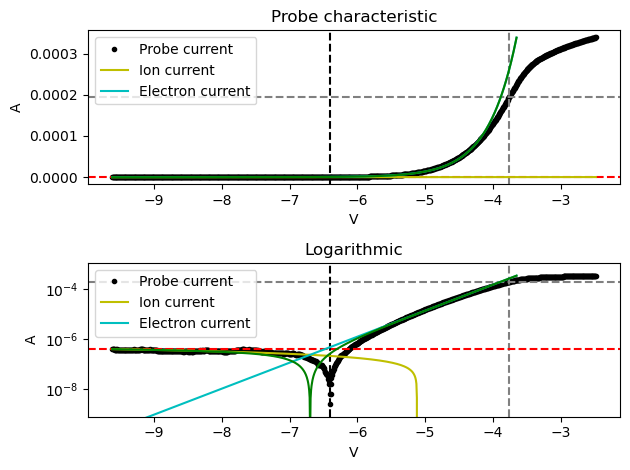

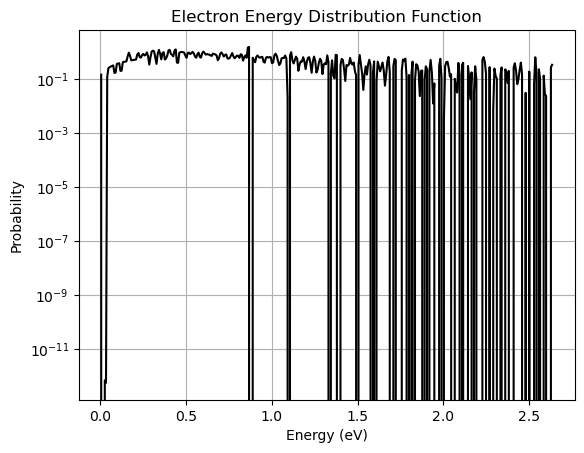

In [22]:
pprint(
    swept_probe_analysis(
        characteristic, probe_area, "He-4+", visualize=True, plot_EEDF=True
    )
)

The cyan and yellow lines indicate the fitted electron and ion currents,
respectively. The green line is the sum of these and agrees nicely with the
data. This indicates a successful analysis.



The next sample probe data is provided by David Pace. It is also obtained
from a low relatively ion temperature and density plasma, in Argon.



In [ ]:
# Load the data from a file and create the Characteristic object
path = (Path.cwd() / ".." / "langmuir_samples" / "Pace2015.npy").resolve()
bias, current = np.load(path)
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))

Initially the electrons are assumed to be Maxwellian. To check this the fit
of the electron growth region will be plotted.



In [ ]:
swept_probe_analysis(
    characteristic,
    0.738 * u.cm**2,
    "Ar-40 1+",
    bimaxwellian=False,
    plot_electron_fit=True,
)

It can be seen that this plasma is slightly bi-Maxwellian, as there are two
distinct slopes in the exponential section. The analysis is now performed
with bimaxwellian set to True, which yields improved results.



In [ ]:
pprint(
    swept_probe_analysis(
        characteristic,
        0.738 * u.cm**2,
        "Ar-40 1+",
        bimaxwellian=True,
        visualize=True,
        plot_electron_fit=True,
    )
)

The probe current resolution of the raw data is relatively poor, but the
analysis still performs well in the ion current region. The bi-Maxwellian
properties are not significant but do make a difference. Check this analysis
without setting `bimaxwellian` to True!
This is reflected in the results, which indicate that the temperatures of
the cold and hot electron population are indeed different, but relatively
close.



This Helium plasma is fully bi-Maxwellian.



In [ ]:
# Import probe data and calculate probe surface area.
path = (Path.cwd() / ".." / "langmuir_samples" / "Beckers2017b.npy").resolve()
bias, current = np.load(path)
characteristic = Characteristic(u.Quantity(bias, u.V), u.Quantity(current, u.A))
probe_length = 1.145 * u.mm
probe_diameter = 1.57 * u.mm
probe_area = probe_length * np.pi * probe_diameter + np.pi * 0.25 * probe_diameter**2

`plot_electron_fit` is set to True to check the bi-Maxwellian properties.
The fit converges nicely to the two slopes of the electron growth region.



In [ ]:
pprint(
    swept_probe_analysis(
        characteristic,
        probe_area,
        "He-4+",
        bimaxwellian=True,
        plot_electron_fit=True,
        visualize=True,
    )
)